In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as oj
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.express as px
import plotly.graph_objects as go

In [28]:
root_folder = r'/Users/yang/Documents/Wilbrecht_Lab/data4analysis/cleaned_preprocessed_data'
combined_df = pd.read_csv(oj(root_folder, 'combined_df.csv'))

In [29]:
print(combined_df.shape)
combined_df.head()

(837305, 39)


index      Head x      Head y      Neck x      Neck y     Torso x  \
0      0   97.949959  125.948250   90.718018  125.915596   78.312035   
1      1  103.294258  126.465607   98.100525  126.174385   85.752670   
2      2  111.046303  126.946213  105.955849  126.559837   93.239532   
3      3  118.300751  127.073494  111.140808  126.629097   98.491478   
4      4  126.184807  126.752533  119.117012  126.511871  106.560745   

      Torso y  Tailhead x  Tailhead y  warped Head x  ...  Head velocity  \
0  126.051994   68.342316  123.691650     297.271604  ...       0.000000   
1  125.916733   74.097397  125.736877     297.810956  ...     178.871955   
2  126.049316   80.696983  125.685104     298.240149  ...     193.672671   
3  126.034889   86.217712  123.775703     298.339819  ...     202.155225   
4  126.113716   94.671455  125.946205     298.074981  ...     200.560089   

   Neck velocity  Torso velocity  Tailhead velocity  Head acceleration  \
0       0.000000        0.000000           0.000000        5366.158657   
1     203.448296      202.902146         165.884591         444.021472   
2     194.897766      191.070609         169.254464         254.476626   
3     184.029159      180.190742         180.965354         -47.854098   
4     200.765801      204.062318         214.144352        -242.376664   

   Neck acceleration  Torso acceleration  Tailhead acceleration  animal  \
0        6103.448865         6087.064396            4976.537731  RRM028   
1        -256.515885         -354.946138             101.096186  RRM028   
2        -326.058207         -326.396008             351.326716  RRM028   
3         502.099255          716.147302             995.369931  RRM028   
4         267.522220          322.237925             183.658880  RRM028   

  session  
0  Day136  
1  Day136  
2  Day136  
3  Day136  
4  Day136  

[5 rows x 39 columns]

(array([3.39387e+05, 8.99850e+04, 6.66150e+04, 5.20860e+04, 4.04870e+04,
        3.22160e+04, 3.14660e+04, 3.13630e+04, 3.08780e+04, 2.83190e+04,
        2.74430e+04, 2.02020e+04, 1.48670e+04, 9.99800e+03, 4.86500e+03,
        2.42400e+03, 1.50900e+03, 8.38000e+02, 6.67000e+02, 5.92000e+02,
        4.79000e+02, 4.57000e+02, 4.41000e+02, 3.78000e+02, 2.57000e+02,
        2.11000e+02, 1.75000e+02, 1.57000e+02, 1.38000e+02, 1.03000e+02]),
 array([  0.        ,  16.66666667,  33.33333333,  50.        ,
         66.66666667,  83.33333333, 100.        , 116.66666667,
        133.33333333, 150.        , 166.66666667, 183.33333333,
        200.        , 216.66666667, 233.33333333, 250.        ,
        266.66666667, 283.33333333, 300.        , 316.66666667,
        333.33333333, 350.        , 366.66666667, 383.33333333,
        400.        , 416.66666667, 433.33333333, 450.        ,
        466.66666667, 483.33333333, 500.        ]),
 <BarContainer object of 30 artists>)

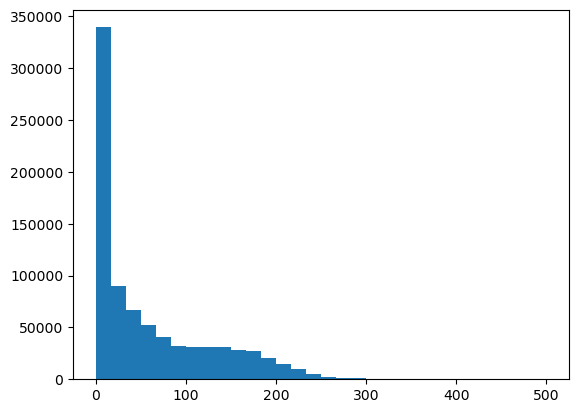

In [30]:
plt.hist(combined_df['Head velocity'], bins=30, range=(0, 500))

In [31]:
def plot_assigned_tracks(df, condition_func):
    '''
    Plot the trials that satisfy the given condition
    
    PART I: Iterate each row in df, extract trial-wise features and record them into result_df
    '''
    current_trial_num = np.nan
    current_bonsai_decision = np.nan
    current_decision = np.nan
    current_restaurant = np.nan
    bonsai_decision = np.nan
    decision = np.nan
    sum_of_speed = 0
    speed_count = 0
    
    #bonsai_decision_list = []
    decision_list = []
    straight_walking_speed_list =[]
    animal_list = []
    session_list = []
    trial_list = []

    for index, row in df.iterrows():
        bonsai_decision = row['label']
        decision = row['decision']
        trial_num = row['trial']
        animal = row['animal']
        session = row['session']
        speed = row['Head velocity']
        restaurant = row['restaurant']
        
    
        if trial_num != current_trial_num: # Start of a new trial
            if speed_count != 0:
                average_speed = sum_of_speed/speed_count
            else:
                average_speed = np.nan

            if current_bonsai_decision == 'collection':
                current_bonsai_decision = 'ACC'
            
            if not np.isnan(current_trial_num):
                if condition_func(current_decision, current_bonsai_decision, average_speed, current_restaurant):
                    #bonsai_decision_list.append(current_bonsai_decision)
                    decision_list.append(current_decision)
                    straight_walking_speed_list.append(average_speed)
                    animal_list.append(animal)
                    session_list.append(session)
                    trial_list.append(current_trial_num)

            current_restaurant = restaurant
            current_bonsai_decision = np.nan    
            current_decision = np.nan
            current_trial_num = trial_num 
            sum_of_speed = 0
            speed_count = 0
        
        if not pd.isna(decision):
            current_decision = decision    
        if not pd.isna(bonsai_decision):
            current_bonsai_decision = bonsai_decision
        
        if pd.isna(current_decision) and (speed < 300):
            sum_of_speed += speed
            speed_count += 1
    

    result_df = pd.DataFrame({
        #'bonsai decision': bonsai_decision_list,
        'decision': decision_list,
        'straight_walking_speed': straight_walking_speed_list,
        'animal': animal_list,
        'session': session_list,
        'trial': trial_list
    })
    plt.hist(straight_walking_speed_list, bins=50)
    plt.show()
    
    '''
    PART II: Iterate through each row in result_df, locate them in df and then plot them.
    '''
    # Extract animal, session, and trial info from the decision dataframe
    decision_info = result_df[['animal', 'session', 'trial']]
    filtered_df = df[
        df[['animal', 'session', 'trial']].apply(tuple, axis=1).isin(decision_info.apply(tuple, axis=1))
    ]
    
    # plot each trial using plotly
    plt.figure(figsize=(10, 10))

    trial_palette = sns.color_palette('deep', n_colors=len(filtered_df['trial'].unique()))
    trial_palette_dict = {trial_num: color for trial_num, color in zip(filtered_df['trial'].unique(), trial_palette)}
    
    decision_palette = sns.color_palette('deep', n_colors=len(result_df['decision'].unique()))
    decision_palette_dict = {decision: color for decision, color in zip(filtered_df['decision'].unique(), decision_palette)}
    decision_palette_dict = {
        "ACC": (0, 1, 0),  # Green with transparency
        "REJ": (1, 0, 0),  # Red with transparency
        "quit": (0, 0, 1),  # Blue with transparency
        "T-Entry": (1, 1, 1), # black
        np.nan: (1, 1, 1) # black
    }
    fig = go.Figure()
    
    # Iterate through each row in result_df
    for _, row in result_df.iterrows():
        # Extract animal, session, and trial information
        decision, animal, session, trial = row['decision'], row['animal'], row['session'], row['trial']
        
        # Filter df for the current trial
        filtered_trial = df[(df['animal'] == animal) & (df['session'] == session) & (df['trial'] == trial)]
        
        # Determine the color for the current trial
        color = 'rgba' + str(tuple(int(c * 255) for c in decision_palette_dict[decision]) + (0.2,))
        
        # Add the trial data to the plot
        fig.add_trace(go.Scatter(
            x=filtered_trial['warped Head x'],
            y=filtered_trial['warped Head y'],
            mode='lines',
            line=dict(color=color, width=0.5),
            showlegend=False
        ))
    
    fig.update_layout(
        xaxis_title='warped Head x',
        yaxis_title='warped Head y',
        yaxis=dict(autorange='reversed'),
        #width = 600,
        #height = 1000
    )
    
    # Adding vertical and horizontal lines and text annotations
    fig.add_vline(x=282, line=dict(color='red', dash='dash', width=1))
    fig.add_annotation(x=285, y=142, text='REJ', showarrow=False, font=dict(color='red'), xanchor='right', yanchor='top')

    fig.add_vline(x=309, line=dict(color='red', dash='dash', width=1))
    fig.add_annotation(x=314, y=142, text='ACC', showarrow=False, font=dict(color='red'), xanchor='right', yanchor='top')

    fig.add_hline(y=46, line=dict(color='red', dash='dash', width=1))
    fig.add_annotation(x=333, y=46, text='T_Entry', showarrow=False, font=dict(color='red'), xanchor='right', yanchor='bottom')

    fig.show()
    '''
    # plot each trial using plt
    for color, (trial_num, group) in zip(palette, filtered_df.groupby('trial')):
        sns.lineplot(
            data=group,
            x='warped Head x',
            y='warped Head y',
            color=color,
            linewidth=0.05,
            legend=False,
            sort=False
        )
    
    plt.axvline(x=282, color='red', linestyle='--', linewidth=1)
    plt.text(285, 142, 'REJ', color='red', ha='right', va='top')

    plt.axvline(x=309, color='red', linestyle='--', linewidth=1)
    plt.text(314, 142, 'ACC', color='red', ha='right', va='top')
    
    plt.axhline(y=46, color='red', linestyle='--', linewidth=1)
    plt.text(plt.xlim()[1], 46, 'T_Entry', color='red', ha='right', va='bottom')
    

    plt.ylim(0, 140)
    plt.xlabel('Head x coordinate')
    plt.ylabel('Head y coordinate')
    plt.title(f'Track of Head of length: {len(df)}')
    plt.legend(title='Trial Number', loc='upper right')
    plt.grid(True)

    # Invert y-axis to match the video coordinate system
    plt.gca().invert_yaxis()

    plt.show()
    '''



In [32]:
def interactive_analysis(combined_df, condition_func):
    """
    Use the slider to adjust the start and length of the range of combined_df.
    Then plot the trials that satisfy the given condition
    
    Parameters:
    - combined_df: The DataFrame to analyze.
    - condition_func: A lambda function to determine the condition for plotting.
    """
    
    # Function to update the selected range based on slider values
    def update_range(range_value, interval):
        global selected_range
        global df_subset
        selected_range = [range_value, range_value + interval]
        df_subset = combined_df.iloc[selected_range[0]:selected_range[1]]
        print(f"Selected range: {selected_range}")

    # Create slider widgets
    range_slider = widgets.IntSlider(value=0, min=0, max=len(combined_df), step=100, description='Start:')
    interval_slider = widgets.IntSlider(value=10000, min=0, max=len(combined_df), step=100, description='Length:')
    interactive_widget = widgets.interactive(update_range, range_value=range_slider, interval=interval_slider)
    display(interactive_widget)

    # Create an output widget for the plots
    output = widgets.Output()

    # Button to trigger further analysis
    analyze_button = widgets.Button(description="Plot")

    # Function to handle button click
    def on_analyze_button_clicked(b):
        with output:
            clear_output(wait=True)  # Clear previous plots
            plot_assigned_tracks(df_subset, condition_func)
    

    # Link the button to the handler function
    analyze_button.on_click(on_analyze_button_clicked)

    # Display the button and output widget
    display(analyze_button)
    display(output)
    

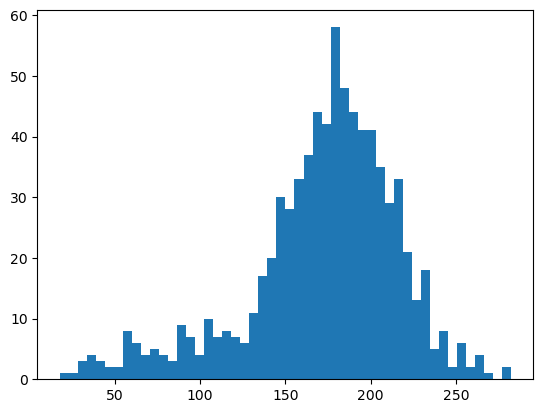

<Figure size 1000x1000 with 0 Axes>

In [33]:
condition_func = lambda sleap_decision, bonsai_decision, average_speed, restaurant: (
    True
    )

plot_assigned_tracks(combined_df[1:100000], condition_func)

Straight walking average speed is not affecting bonsai vs sleap decision.
Some implication from the trajectories. see in notion

In [34]:
condition_func = lambda sleap_decision, bonsai_decision, average_speed, restaurant: (
    (bonsai_decision == 'quit' and sleap_decision == 'REJ')
    )

interactive_analysis(combined_df, condition_func)

interactive(children=(IntSlider(value=0, description='Start:', max=837305, step=100), IntSlider(value=10000, d…

Button(description='Plot', style=ButtonStyle())

Output()

In [35]:
condition_func = lambda sleap_decision, bonsai_decision, average_speed, restaurant: (
    (bonsai_decision == 'ACC' and sleap_decision == 'REJ')
    )

interactive_analysis(combined_df, condition_func)

interactive(children=(IntSlider(value=0, description='Start:', max=837305, step=100), IntSlider(value=10000, d…

Button(description='Plot', style=ButtonStyle())

Output()

In [36]:
condition_func = lambda sleap_decision, bonsai_decision, average_speed, restaurant: (
    (bonsai_decision == 'REJ' and sleap_decision == 'ACC')
    )

interactive_analysis(combined_df, condition_func)

interactive(children=(IntSlider(value=0, description='Start:', max=837305, step=100), IntSlider(value=10000, d…

Button(description='Plot', style=ButtonStyle())

Output()